### Explorartory Data Analysis

Manasa P (21WU0101055 - Team 3)

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset into a pandas DataFrame

df=pd.read_csv(r"country_wise_latest.csv")

In [3]:
# Displaying the first 5 rows

df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [10]:
# checking for missing values: 
# no null values

print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [11]:
# summarizing the dataset (e.g., data types, number of rows/columns).
print("\nDataset summary:")
print(df.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              

In [12]:
# Generating basic statistics of numerical columns

print(df.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

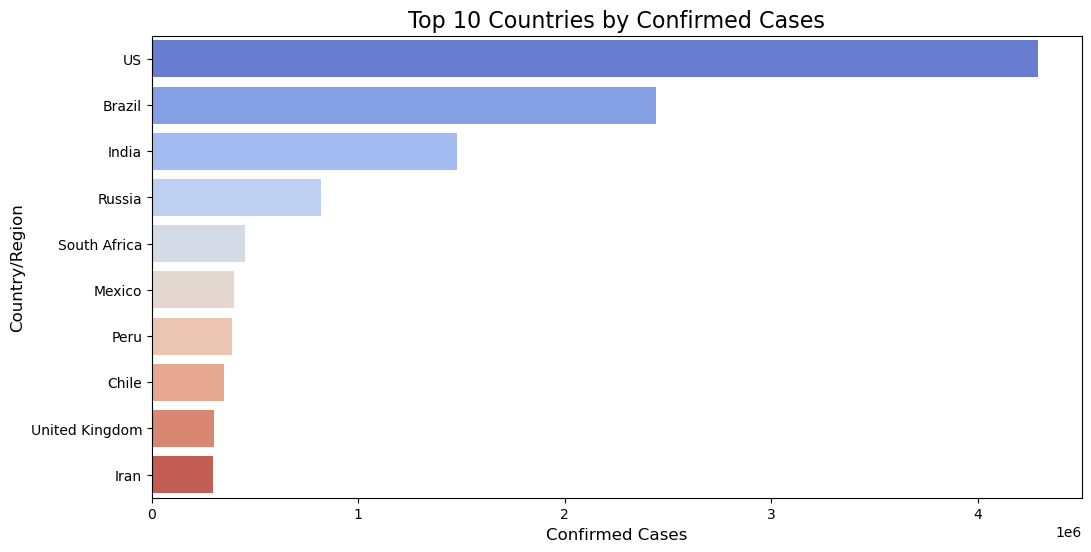

In [6]:
# Three different visualizations to uncover insights about the dataset:

# 1. Bar Plot: Top 10 countries by confirmed cases
top_countries_confirmed = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries_confirmed, x='Confirmed', y='Country/Region', palette='coolwarm')
plt.title('Top 10 Countries by Confirmed Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

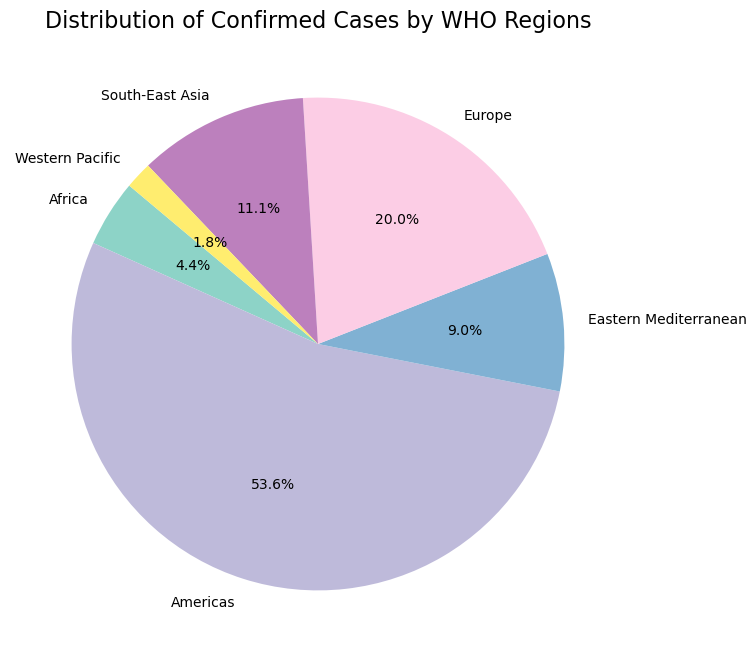

In [7]:
# 2. Pie Chart: Distribution of cases by WHO Regions
cases_by_region = df.groupby('WHO Region')['Confirmed'].sum()
plt.figure(figsize=(8, 8))
cases_by_region.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribution of Confirmed Cases by WHO Regions', fontsize=16)
plt.ylabel('')
plt.show()

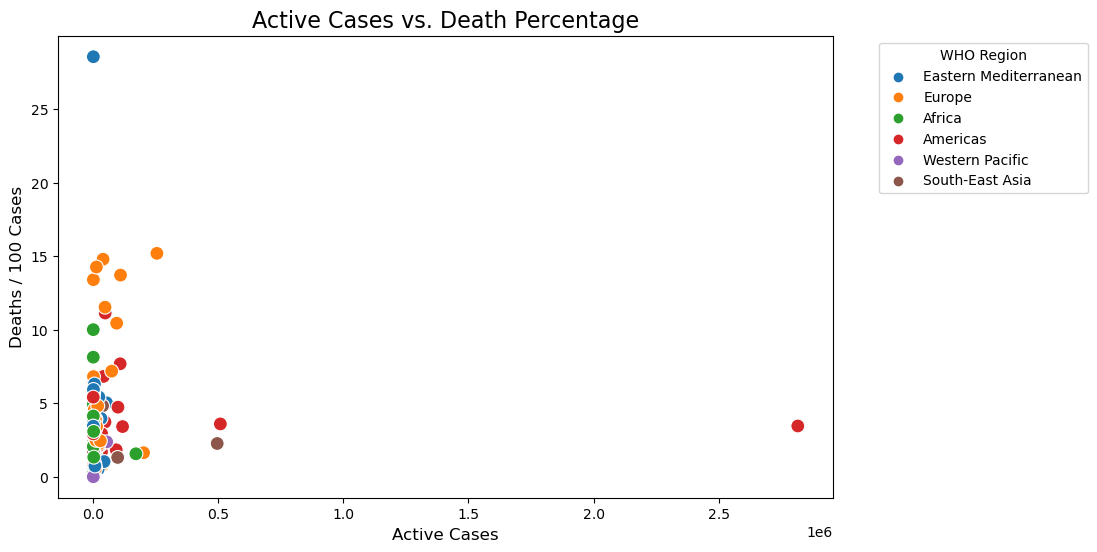

In [8]:
# 3. Scatter Plot: Relationship between active cases and death percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Active', y='Deaths / 100 Cases', hue='WHO Region', palette='tab10', s=100)
plt.title('Active Cases vs. Death Percentage', fontsize=16)
plt.xlabel('Active Cases', fontsize=12)
plt.ylabel('Deaths / 100 Cases', fontsize=12)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Insight from Analysis:
From the above scatter plot of active cases vs. death percentage, 
We infer that the countries with a high number of active cases do not necessarily have the highest death percentage.

For example, some regions with moderate active cases have higher death percentages, which indicates:
- Strains on healthcare systems.
- Differences in population demographics like age distribution.
- Variations in healthcare quality or reporting standards.

Also, the pie chart of WHO regions revealed that a small number of WHO regions dominate the total confirmed cases, showing disparities in case distribution, likely influenced by population size, testing capacity, or spread patterns.

### Exploratory Data Analysis Report: COVID-19 Country-Wise Data

Dataset Information:

- Total Entries: 187
- Columns: 15 (country, confirmed cases, deaths, active cases, WHO region, percentage metrics)
- Key Columns:
  - Confirmed: Total confirmed COVID-19 cases.
  - Deaths: Total deaths.
  - Recovered: Total recoveries.
  - Active: Current active cases.
  - Deaths / 100 Cases: Death percentage per 100 confirmed cases.
  - WHO Region: Geographical classification.

Findings:
1. Top Countries by Confirmed Cases:
   - Countries with the highest confirmed cases include USA, India, Brazil, and Russia.
   - The bar plot highlights these countries, showing significant variation in case counts.


2. Distribution of Confirmed Cases by WHO Region
   - The pie chart illustrates that a majority of cases are concentrated in a few regions:
     - Americas and Europe dominate the distribution.
     - Regions like Africa and Western Pacific account for a smaller share.
   - This distribution reflects regional disparities in population, testing capabilities, and pandemic management strategies.


3. Active Cases vs. Death Percentage
   - The scatter plot reveals no strong correlation between active cases and death percentages.
   - Some countries with moderate active cases have high death rates, possibly due to healthcare system limitations or reporting      practices.   
   
   
4. Death Rate Variability:
   - Countries with similar active cases exhibit varying death rates, suggesting factors like healthcare infrastructure, age demographics, and testing accuracy influence outcomes.


5. Regional Disparities:
   - The Americas and Europe contribute disproportionately to global confirmed cases, reflecting higher transmission rates and/or better testing.